In [1]:
%matplotlib inline

from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('./assets/mask.jpg')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

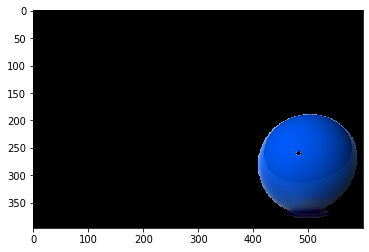

In [3]:
# Defining range in hsv terms
lower_blue = np.array([94,80,2]) 
upper_blue = np.array([126,255,255]) 

mask = cv2.inRange(hsv_image, lower_blue, upper_blue) 

res = cv2.bitwise_and(image,image, mask= mask) 
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
res = Image.fromarray(res.astype("uint8"))
plt.imshow(res)



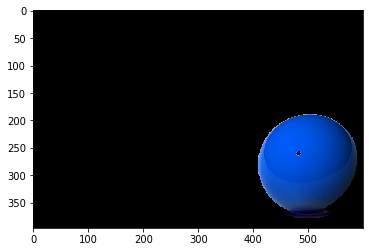

In [5]:
img = np.array(hsv_image)
mask = np.zeros_like(hsv_image)
for h in range(img.shape[0]):
    for w in range(img.shape[1]):
        if (img[h][w][0] >= lower_blue[0] and img[h][w][0] <= upper_blue[0] and img[h][w][1] >= lower_blue[1]  and img[h][w][2] >= lower_blue[2]  ):
            mask[h][w] = img[h][w]

            
blue_detected = cv2.cvtColor(mask,cv2.COLOR_HSV2RGB)
blue_detected = Image.fromarray(blue_detected.astype("uint8"))
plt.imshow(blue_detected)
blue_detected.save('./outputs/blue_detected.jpg')